In [2]:
#Question 02

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#defining the functions
def sigmoid(x, w1, b1):
    sgm = 1/(1.0 + np.exp(-x.dot(w1) - b1))
    return sgm

def calc_accuracy(y_predicted, y_check):
    y_predicted = np.argmax(y_predicted, axis = 1)#finds the maximum value index in each row(prediction)
    y_check = np.argmax(y_check, axis = 1)
    accuracy = np.sum(y_predicted == y_check)/len(y_check)
    return accuracy*100

In [8]:
#-------------------------------------------------------------------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)
#-------------------------------------------------------------------------------------------------------------------------------
K = len(np.unique(y_train)) # Classes(Finds the unique labels in y_train)
Ntr = x_train.shape[0] # no. of training examples
Nte = x_test.shape[0] # no. of test examples
Din = 3072 # CIFAR10 32*32*3 the total intensity values in the RGB image

## here we do not use mean normalization
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) #takes the pixel wise mean for all the images
x_train = x_train - mean_image
x_test = x_test - mean_image

'''there are 10 classes in CIFARI-10 and the Y gives values form 0-9,
these are converted to a bonary matrix i such a way that the index of the matrix will represent one(1) eg. [0,0,0,0,0,0,1,0,0,0] for y = 6'''
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#each row gives the image pixels(Here we vectorise the given image data)
x_train = np.reshape(x_train,(Ntr,Din)) 
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


170500096/170498071 [==============================] - 6s 0us/step
x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [9]:
H = 200
std = 1e-6
#giving random weight to both w1 and w2 initially
w1 = std*np.random.randn(Din, H) #Hidden layer weights
w2 = std*np.random.randn(H, K) #last layer weights
b1 = np.zeros(H) #hidden layer bias
b2 = np.zeros(K) #last layer bias
print("w1:", w1.shape)
print("w2:", w2.shape)
print("b1:", b1.shape)
print("b2:", b2.shape)

batch_size = Ntr
iterations = round(Ntr/batch_size)*1000
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6 #regularization coefficient
lr_history = []
loss_history = []
train_acc_history = [] #training accuracy
val_acc_history = [] #validation accuracy history
for t in range(1,iterations + 1):
    batch_indices = np.random.choice(Ntr,batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = sigmoid(x,w1,b1)
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2*w2) + np.sum(w1*w1))
                                #----------------------------------------------------------------------
    #calculations and appending
    loss_history.append(loss)

    #training accuracy
    train_accuracy = calc_accuracy(y_pred, y)
    train_acc_history.append(train_accuracy)

    #calculating rhe validation accuracy
    h_test = sigmoid(x_test,w1,b1)
    y_pred_test = h_test.dot(w2) + b2
    validation_accuracy = calc_accuracy(y_pred_test, y_test)
    val_acc_history.append(validation_accuracy)

    lr_history.append(lr)
    #----------------------------------------------------------------------
    if (t == 1 or t%100 == 0):
        # print('Iteration: %d / %d , loss: %f'%(t,iterations,loss))
        print('Iteration: %d/%d , Loss: %f , Training_accuracy: %f , Validation_accuracy: %f , Lr: %f'%(t, iterations, loss, train_accuracy, validation_accuracy, lr))
    
    dy_pred = 1./batch_size*2.0*(y_pred - y) #this is the partial derivative of loss w.r.t dy_pred
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis = 0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)
    w1 = w1 -  lr*dw1
    w2 = w2 - lr*dw2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2
    lr = lr*lr_decay

print("Training Done!!")
print("Loss: ", loss) #final loss
print("Training_accuracy: ",train_accuracy) #final training accuracy
print("Test_accuracy: ", validation_accuracy) #final test accuracy
print('Learning Rate:', lr)
#------------------------------------
#calculating the testing loss
test_loss = (1./Nte)*(np.square(y_pred_test - y_test)).sum()#y_test_pred defined on line 39 to calculate validation accuracy
print('Testing Loss: ', test_loss)
#------------------------------------


w1: (3072, 200)
w2: (200, 10)
b1: (200,)
b2: (10,)
Iteration: 1/1000 , Loss: 0.999999 , Training_accuracy: 10.186000 , Validation_accuracy: 10.000000 , Lr: 0.014000
Iteration: 100/1000 , Loss: 0.789210 , Training_accuracy: 37.916000 , Validation_accuracy: 37.350000 , Lr: 0.012680
Iteration: 200/1000 , Loss: 0.757760 , Training_accuracy: 43.378000 , Validation_accuracy: 41.780000 , Lr: 0.011473
Iteration: 300/1000 , Loss: 0.729299 , Training_accuracy: 47.334000 , Validation_accuracy: 43.400000 , Lr: 0.010380
Iteration: 400/1000 , Loss: 0.717332 , Training_accuracy: 48.786000 , Validation_accuracy: 44.070000 , Lr: 0.009392
Iteration: 500/1000 , Loss: 0.705630 , Training_accuracy: 50.552000 , Validation_accuracy: 44.840000 , Lr: 0.008498
Iteration: 600/1000 , Loss: 0.691320 , Training_accuracy: 52.294000 , Validation_accuracy: 44.780000 , Lr: 0.007689
Iteration: 700/1000 , Loss: 0.686799 , Training_accuracy: 53.388000 , Validation_accuracy: 44.620000 , Lr: 0.006957
Iteration: 800/1000 , L

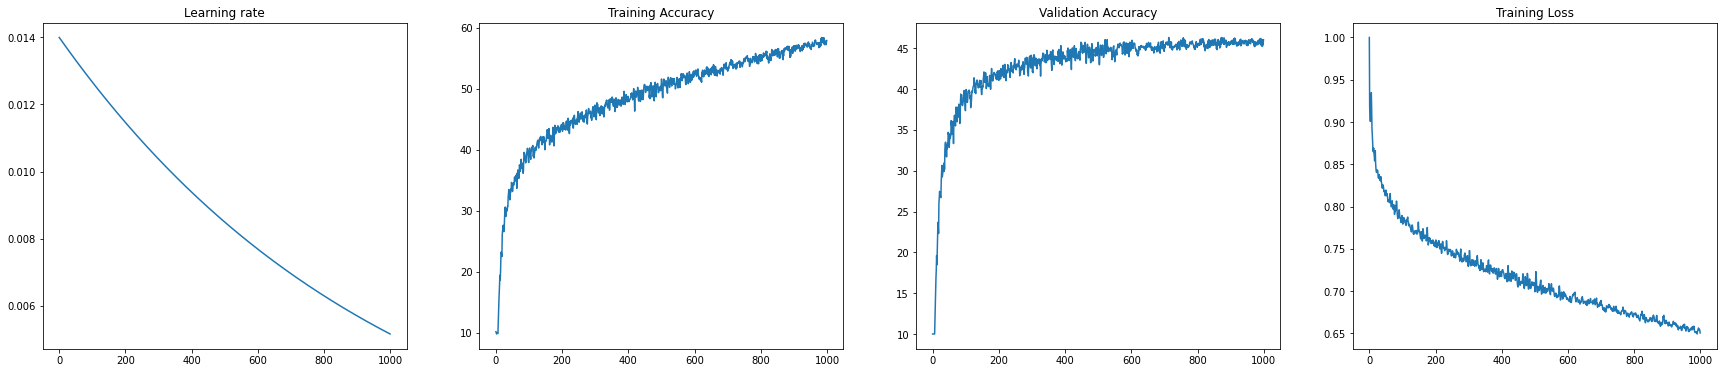

In [10]:

#-----------------------------------------------------------------------------------------------------------------------------
titles = ['Learning rate' ,'Training Accuracy', 'Validation Accuracy', 'Training Loss']
curves = [lr_history, train_acc_history, val_acc_history, loss_history]
plt.figure(figsize = (30,6))
for i in range(4):
    plt.subplot(1, 4, i+1)# here we use subplot not subplots. directly addressing the subplot
    plt.plot(curves[i])#imshow(images[i])
    plt.title(titles[i])
    #plt.savefig('Figures/4.curves.png')
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------